# Programming Assignment: A

Implement a 1-dimensional cellular automaton in Python with the $k = 2$ states $\{0, 1\}$, with a neighborhood radius of $r = 1$ or $r = 2$, and $84$ cells.

The boundary cells $j = 0$, $j = 1$, $j = 82$, $j = 83$ shall be fixed to the content a $j = 0$. The programm shall depict in every line the complete state of all $84$ cells as `text console ASCII` output.

Implement two possible starting conditions for the CA:

- **S:** a seed (all cells are empty but cell no $42$, $a_{i=42} = 1$), and
- **R:** random starting condition, each cell is set with a probability of $p = 0.5$.

Let the user enter at runtime: the neighborhood radius $r$, the rule for the CA (Wolfram Notation), and the starting condition (S or R) and depict at least 20 iterations of the CA.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from collections.abc import Sequence, MutableSequence

CELL_WIDTH: int = 20
CELL_HEIGHT: int = CELL_WIDTH


def middle_cell(width: int = 84) -> list[int]:
    """Create an empty cell board with the middle cell activated."""
    cells = [0 for _ in range(width)]
    cells[int(width / 2)] = 1
    return cells


def random_cells(width: int = 84) -> list[int]:
    import random

    return random.choices((0, 1), k=width)


def ascii_iterations(
    initial_state: Sequence[int],
    death_rules: Sequence[Sequence[int]],
    spawn_rules: Sequence[Sequence[int]],
    radius: int = 3,
    iterations: int = 20,
) -> str:
    def next_state(
        state: Sequence[int],
        back_buffer: MutableSequence[int],
    ):
        offset = radius // 2
        for i in range(offset, len(state) - radius):
            segment = tuple(state[i : i + radius])
            if segment in death_rules:
                back_buffer[i + offset] = 0
            elif segment in spawn_rules:
                back_buffer[i + offset] = 1

    buf = []
    back_buffer = [e for e in initial_state]
    for _ in range(iterations):
        line = ""
        for c in initial_state:
            line += " " if c == 0 else "#"
        next_state(initial_state, back_buffer)
        initial_state, back_buffer = back_buffer, initial_state
        buf.append(line)
    return "\n".join(buf)


def draw_iterations(
    initial_state: Sequence[int],
    death_rules: Sequence[Sequence[int]],
    spawn_rules: Sequence[Sequence[int]],
    radius: int = 3,
    iterations: int = 20,
):
    def next_state(
        state: Sequence[int],
        back_buffer: MutableSequence[int],
    ):
        offset = radius // 2
        for i in range(offset, len(state) - radius):
            segment = tuple(state[i : i + radius])
            if segment in death_rules:
                back_buffer[i + offset] = 0
            elif segment in spawn_rules:
                back_buffer[i + offset] = 1

    cell_count = len(initial_state)
    px = 1 / plt.rcParams["figure.dpi"]
    figsize = (cell_count * CELL_WIDTH * px, iterations * CELL_HEIGHT * px)
    x, y = 0, 0
    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect("equal", "box")
    back_buffer = [e for e in initial_state]
    for _ in range(iterations):
        for c in initial_state:
            color = "white" if c == 0 else "black"
            ax.fill(
                (x, x + CELL_WIDTH, x + CELL_WIDTH, x),
                (y, y, y - CELL_HEIGHT, y - CELL_HEIGHT),
                color,
            )
            x += CELL_WIDTH
        x = 0
        y -= CELL_HEIGHT
        next_state(initial_state, back_buffer)
        initial_state, back_buffer = back_buffer, initial_state
    ax.axis("off")


def display_iterations(
    initial_state: Sequence[int],
    death_rules: Sequence[Sequence[int]],
    spawn_rules: Sequence[Sequence[int]],
    radius: int = 3,
    iterations: int = 20,
    figure: bool = True,
    ascii: bool = True,
):
    if figure:
        draw_iterations(
            [e for e in initial_state], death_rules, spawn_rules, radius, iterations
        )
    if ascii:
        print(
            ascii_iterations(
                initial_state, death_rules, spawn_rules, radius, iterations
            )
        )

## Rule 90

                                          #                                         
                                         # #                                        
                                        #   #                                       
                                       # # # #                                      
                                      #       #                                     
                                     # #     # #                                    
                                    #   #   #   #                                   
                                   # # # # # # # #                                  
                                  #               #                                 
                                 # #             # #                                
                                #   #           #   #                               
                               # # # #         # # # #           

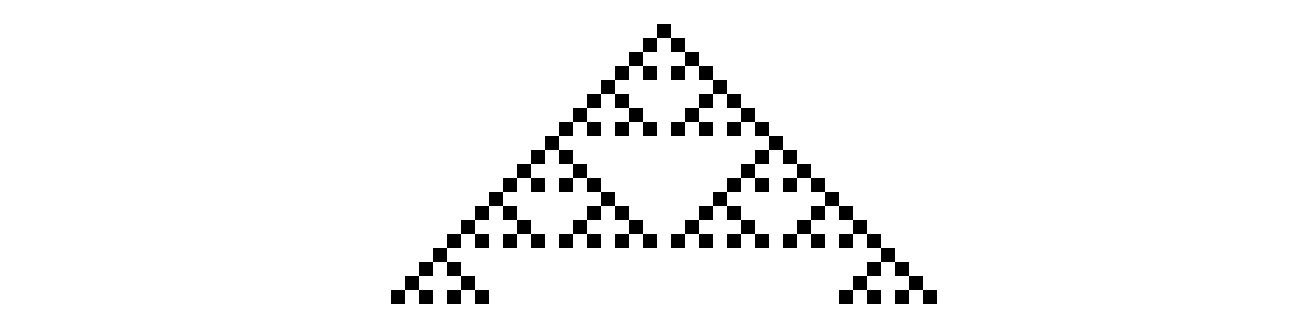

In [3]:
display_iterations(
    middle_cell(),
    death_rules=(
        (1, 1, 1),
        (1, 0, 1),
        (0, 1, 0),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 1, 0),
        (1, 0, 0),
        (0, 1, 1),
        (0, 0, 1),
    ),
)

  ##     # #  ###   ####   ##    #### #      ##  ##  #    ## ######   ##  # ## #   #
  ###   #   ### ## ##  ## ####  ##  #  #    ######### #  ### #    ## #####  ##  #  #
  # ## # # ## # ## ###### #  ####### ## #  ##       #  ### #  #  ### #   ####### # #
    ##     ##   ## #    #  ###     # ##  #####     # ### #  ## ### #  # ##     #   #
   ####   #### ###  #  # ### ##   #  #####   ##   #  # #  #### # #  ##  ###   # #  #
  ##  ## ##  # # ### ##  # # ### # ###   ## #### # ##   ###  #    ####### ## #   # #
  ###### ####    # # ####    # #   # ## ### #  #   ### ## ### #  ##     # ##  # #  #
  #    # #  ##  #    #  ##  #   # #  ## # #  ## # ## # ## # #  #####   #  ####   # #
   #  #   ###### #  # ###### # #   ####    ####   ##   ##    ###   ## # ###  ## #  #
  # ## # ##    #  ##  #    #    # ##  ##  ##  ## #### ####  ## ## ###   # #####  # #
    ##   ###  # ###### #  # #  #  ############## #  # #  ##### ## # ## #  #   ###  #
   #### ## ###  #    #  ##   ## ###            #  ##   ###   # ##

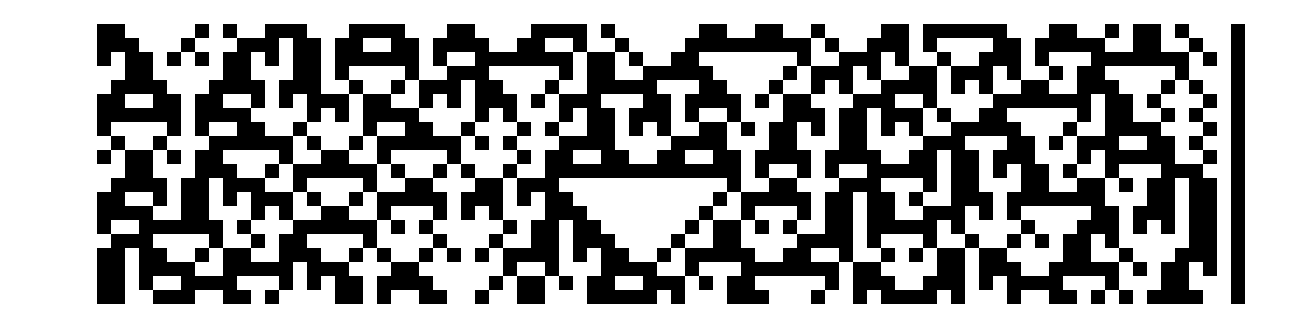

In [4]:
display_iterations(
    random_cells(),
    death_rules=(
        (1, 1, 1),
        (1, 0, 1),
        (0, 1, 0),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 1, 0),
        (1, 0, 0),
        (0, 1, 1),
        (0, 0, 1),
    ),
)

## Rule 50

                                          #                                         
                                         # #                                        
                                        # # #                                       
                                       # # # #                                      
                                      # # # # #                                     
                                     # # # # # #                                    
                                    # # # # # # #                                   
                                   # # # # # # # #                                  
                                  # # # # # # # # #                                 
                                 # # # # # # # # # #                                
                                # # # # # # # # # # #                               
                               # # # # # # # # # # # #           

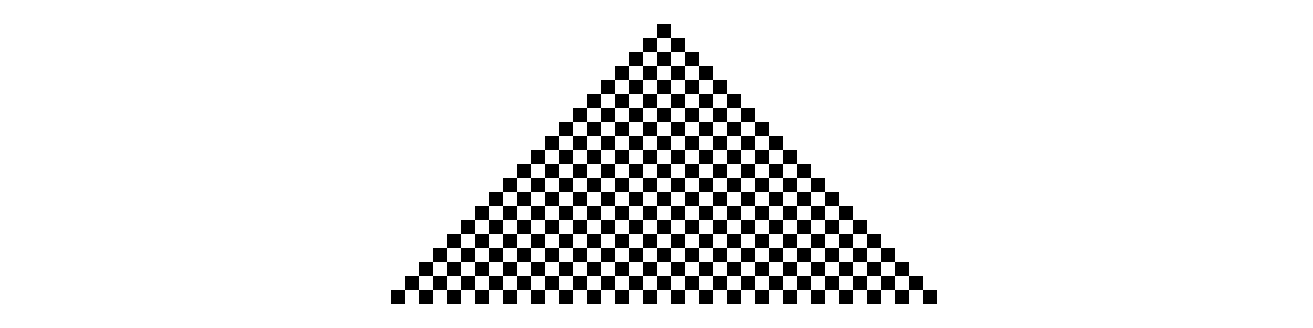

In [5]:
display_iterations(
    middle_cell(),
    death_rules=(
        (1, 1, 1),
        (1, 1, 0),
        (0, 1, 1),
        (0, 1, 0),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 0, 1),
        (1, 0, 0),
        (0, 0, 1),
    ),
)

##  ## ## #   ### # ### #     #######  # ##  ##### # #####  #   # # # ## # ## #  # #
####  #  # # #   # #   # #   #       ## #  ##     # #     ## # # # # #  # #  # ##  #
##  ## ## # # # # # # # # # # #     #  # ##  #   # # #   #  # # # # # ## # ## #  # #
####  #  # # # # # # # # # # # #   # ## #  ## # # # # # # ## # # # # #  # #  # ##  #
##  ## ## # # # # # # # # # # # # # #  # ##  # # # # # # #  # # # # # ## # ## #  # #
####  #  # # # # # # # # # # # # # # ## #  ## # # # # # # ## # # # # #  # #  # ##  #
##  ## ## # # # # # # # # # # # # # #  # ##  # # # # # # #  # # # # # ## # ## #  # #
####  #  # # # # # # # # # # # # # # ## #  ## # # # # # # ## # # # # #  # #  # ##  #
##  ## ## # # # # # # # # # # # # # #  # ##  # # # # # # #  # # # # # ## # ## #  # #
####  #  # # # # # # # # # # # # # # ## #  ## # # # # # # ## # # # # #  # #  # ##  #
##  ## ## # # # # # # # # # # # # # #  # ##  # # # # # # #  # # # # # ## # ## #  # #
####  #  # # # # # # # # # # # # # # ## #  ## # # # # # # ## # # 

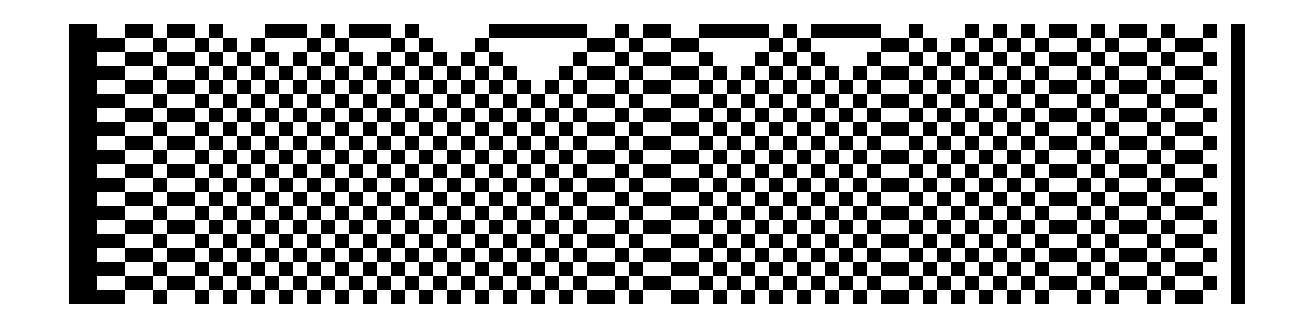

In [6]:
display_iterations(
    random_cells(),
    death_rules=(
        (1, 1, 1),
        (1, 1, 0),
        (0, 1, 1),
        (0, 1, 0),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 0, 1),
        (1, 0, 0),
        (0, 0, 1),
    ),
)

## Rule 54

                                          #                                         
                                         ###                                        
                                        #   #                                       
                                       ### ###                                      
                                      #   #   #                                     
                                     ### ### ###                                    
                                    #   #   #   #                                   
                                   ### ### ### ###                                  
                                  #   #   #   #   #                                 
                                 ### ### ### ### ###                                
                                #   #   #   #   #   #                               
                               ### ### ### ### ### ###           

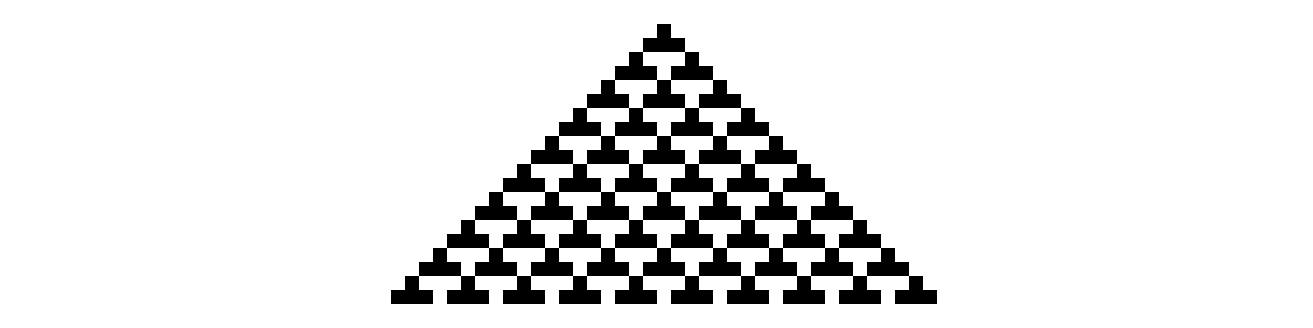

In [7]:
display_iterations(
    middle_cell(),
    death_rules=(
        (1, 1, 1),
        (1, 1, 0),
        (0, 1, 1),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 0, 1),
        (1, 0, 0),
        (0, 1, 0),
        (0, 0, 1),
    ),
)

#      # # # #####  #       # ##    ### # # ##  ### #   ## #     ###    # ## #     #
#     #######     ####     ###  #  #   #####  ##   ### #  ###   #   #  ###  ###    #
#    #       #   #    #   #   ####### #     ##  # #   ####   # ### ####   ##   #   #
#   ###     ### ###  ### ### #       ###   #  ###### #    # ###   #    # #  # ###  #
#  #   #   #   #   ##   #   ###     #   # ####      ###  ###   # ###  ########   # #
# ### ### ### ### #  # ### #   #   ### ###    #    #   ##   # ###   ##        # ## #
#    #   #   #   ######   ### ### #   #   #  ###  ### #  # ###   # #  #      ###   #
#   ### ### ### #      # #   #   ### ### ####   ##   ######   # ########    #   #  #
#  #   #   #   ###    ##### ### #   #   #    # #  # #      # ###        #  ### ### #
# ### ### ### #   #  #     #   ### ### ###  ##########    ###   #      ####   #    #
#    #   #   ### ######   ### #   #   #   ##          #  #   # ###    #    # ###   #
#   ### ### #   #      # #   ### ### ### #  #        ###### ###  

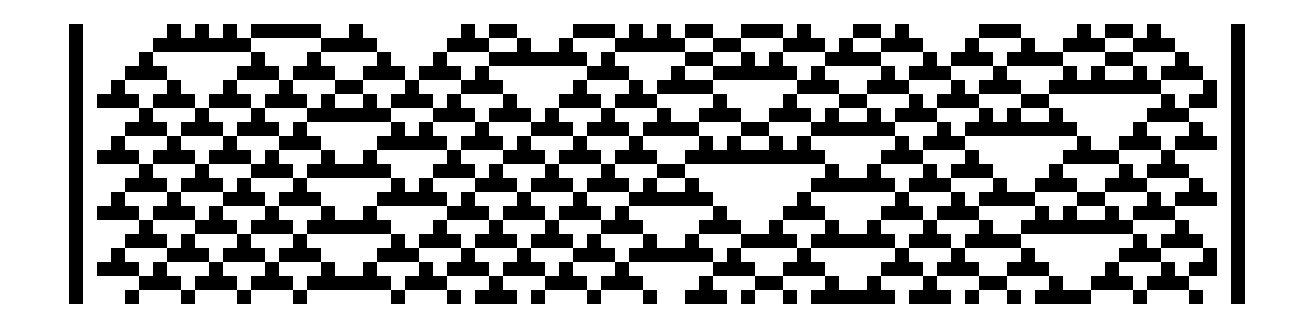

In [8]:
display_iterations(
    random_cells(),
    death_rules=(
        (1, 1, 1),
        (1, 1, 0),
        (0, 1, 1),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 0, 1),
        (1, 0, 0),
        (0, 1, 0),
        (0, 0, 1),
    ),
)

## Rule 30

                                          #                                         
                                         ###                                        
                                        ##  #                                       
                                       ## ####                                      
                                      ##  #   #                                     
                                     ## #### ###                                    
                                    ##  #    #  #                                   
                                   ## ####  ######                                  
                                  ##  #   ###     #                                 
                                 ## #### ##  #   ###                                
                                ##  #    # #### ##  #                               
                               ## ####  ## #    # ####           

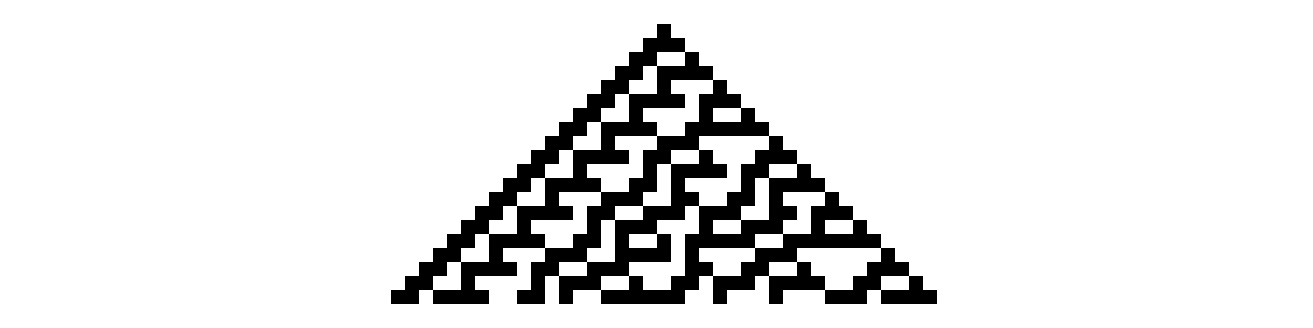

In [16]:
display_iterations(
    middle_cell(),
    death_rules=(
        (1, 1, 1),
        (1, 1, 0),
        (1, 0, 1),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 0, 0),
        (0, 1, 1),
        (0, 1, 0),
        (0, 0, 1),
    ),
)

## # # ##  #   ###  #    #  ##  ## ## # ##### # # ######### #### # ###  # # ### ####
## # # # #### ##  ####  ##### ###  #  # #     # # #         #    # #  ### # #   # ##
## # # # #    # ###   ###     #  ###### ##   ## # ##       ###  ## ####   # ## ## ##
## # # # ##  ## #  # ##  #   #####      # # ##  # # #     ##  ###  #   # ## #  #  ##
## # # # # ###  #### # #### ##    #    ## # # ### # ##   ## ###  #### ## #  ########
## # # # # #  ###    # #    # #  ###  ##  # # #   # # # ##  #  ###    #  ####     ##
## # # # # ####  #  ## ##  ## ####  ### ### # ## ## # # # ######  #  #####   #   ###
## # # # # #   ######  # ###  #   ###   #   # #  #  # # # #     ######    # ### ####
## # # # # ## ##     ### #  #### ##  # ### ## ####### # # ##   ##     #  ## #   # ##
## # # # # #  # #   ##   ####    # ### #   #  #       # # # # ## #   #####  ## ## ##
## # # # # #### ## ## # ##   #  ## #   ## ######     ## # # # #  ## ##    ###  #  ##
## # # # # #    #  #  # # # #####  ## ##  #     #   ##  # # # ###

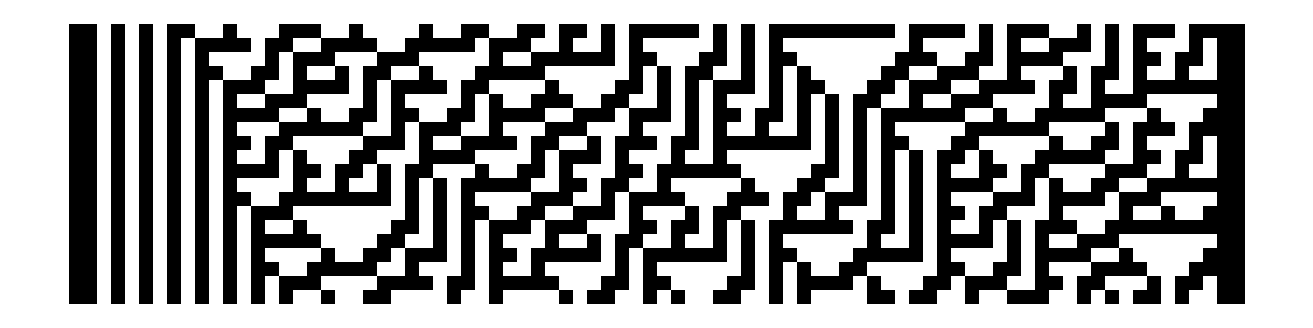

In [10]:
display_iterations(
    random_cells(),
    death_rules=(
        (1, 1, 1),
        (1, 1, 0),
        (1, 0, 1),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 0, 0),
        (0, 1, 1),
        (0, 1, 0),
        (0, 0, 1),
    ),
)

## Rule 110

                                          #                                         
                                         ##                                         
                                        ###                                         
                                       ## #                                         
                                      #####                                         
                                     ##   #                                         
                                    ###  ##                                         
                                   ## # ###                                         
                                  ####### #                                         
                                 ##     ###                                         
                                ###    ## #                                         
                               ## #   #####                      

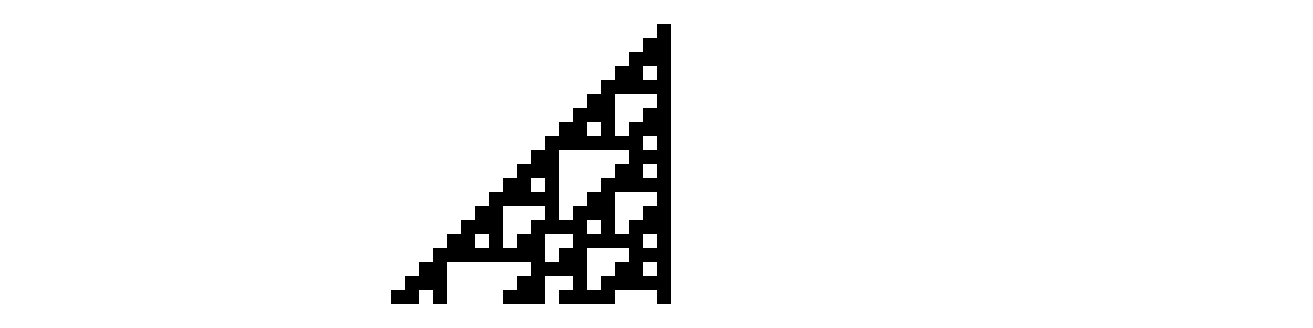

In [11]:
display_iterations(
    middle_cell(),
    death_rules=(
        (1, 1, 1),
        (1, 0, 0),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 1, 0),
        (1, 0, 1),
        (0, 1, 1),
        (0, 1, 0),
        (0, 0, 1),
    ),
)

##  ### #  ### ### ##     ## #  #### ##   #  #  # # # # ##  #  ###     ###   ###    
## ## ### ## ### ####    ##### ##  ####  ## ## ########### ## ## #    ## #  ## #    
####### ###### ###  #   ##   #### ##  # ########         #########   ##### #####    
##    ###    ### # ##  ###  ##  #### ####      #        ##       #  ##   ###   #    
##   ## #   ## ###### ## # ### ##  ###  #     ##       ###      ## ###  ## #  ##    
##  #####  #####    ######## #### ## # ##    ###      ## #     ##### # ##### ###    
## ##   # ##   #   ##      ###  #########   ## #     #####    ##   #####   ### #    
#####  #####  ##  ###     ## # ##       #  #####    ##   #   ###  ##   #  ## ###    
##  # ##   # ### ## #    ########      ## ##   #   ###  ##  ## # ###  ## ##### #    
## #####  #### ######   ##      #     ######  ##  ## # ### ####### # #####   ###    
####   # ##  ###    #  ###     ##    ##    # ### ####### ###     #####   #  ## #    
## #  ##### ## #   ## ## #    ###   ###   #### ###     ### #    #

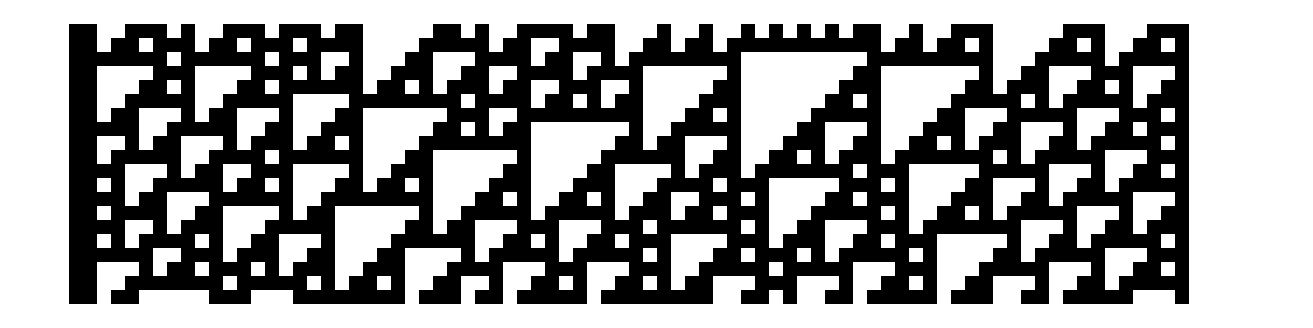

In [12]:
display_iterations(
    random_cells(),
    death_rules=(
        (1, 1, 1),
        (1, 0, 0),
        (0, 0, 0),
    ),
    spawn_rules=(
        (1, 1, 0),
        (1, 0, 1),
        (0, 1, 1),
        (0, 1, 0),
        (0, 0, 1),
    ),
)

## Try it your self

The `display_iterations` functions takes the following parameters:

- `initial_state: Sequence[int]`: which is the initial state of the automaton,
  you could pass

  - `random_cells()` to have a random automaton state.
  - `middle_cell()` to have a blank state with the middle cell activated.
  - just enter your desired states.

- `death_rules: Sequence[Sequence[int]]` a sequence of rules for killing cells,
  it should consist of tuples were activated cells are marked with 1 and
  deactivated cells are marked with a zero.
- `spawn_rules: Sequence[Sequence[int]]` a sequence of rules for spawning new
  cells, it should consist of tuples were activated cells are marked with 1 and
  deactivated cells are marked with a zero.
- `radius: int = 3` the radius to use for updating the state.
- `iterations: int = 20` the number iterations desired to render.
- `figure: bool = True` to display iterations in an image.
- `ascii: bool = True` to print ascii output.

Note: the tuple size of the rules and radius must be matched manually.